## 2. Mathematical model ##

 To better understand the impact that the switch to renewables will have upon the United States economy, we will be assesing the impact of this change upon three seperate energy sectors: electrcity, transportation and heating. For each of these sectors, we will use historical data about US energy usage to forecast projected usage via a least squares regression. We will then examine how each sector will be impacted by the switch to renewable energy that the Biden administration has pledged to. 

To assess the feasibility of moving away from fossil fuels, we will be constructing a set of models for three major energy sectors: electricity generation, transportation, and heating. For each of these subproblems, we will create a linear model that serve to help in our feasibility assesment. The decision variables in all of our models are the various resources that are utilized to produce energy. We will specficially be focusing on the impact of solar, wind, hydrothermal, geothermal, nuclear, coal, oil, and natural gas on energy production. The amount of energy produced by each of these sources will serve as the decision variables in our mathematical models. One constraint on this model is that the total energy produced must meet the demand for the corresponding sector. Another constraint on this model is that the total carbon-dioxide emissions of all the energy source be within the targets set by the Biden administration. The objective model for this is to minimize the cost of energy usage. This serves to ensure energy prices are not raised as the transition to renewables occurs.


To accurately juddge the maximal amount of carbon-dioxide that is allowable, we will be using the US guidelines that states that carbon-dioxide emissions should decrease by 25% by 2025, 30% by 2030 and 100% by 2050 relative to the emissions in 2005. To account for the specfic emissions given by a given sector, we plan to scale the total carbon dioxide emission by the percentage contributed by a given sector. The total carbon dioxide emissions in 2005 was given by 19.42 metric tons. Mathematically, the general form of the LPs we will be constructed are provided below.




$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& EnergyCost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <= 19.42 * (Sector Contribution) 
\end{aligned}
$$


In addition to this basic version of the LP, it is important to realize that there is not an infinite amount of energy that can be created using renewables. Thus, we must include limits on the maximum amount of energy that can be generated using renewables. We also must constrain the degree to which we rely upon fossil fuels, as overtime the US government's plan seeks to reduce dependency. With these considerations, our final model becomes


$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& EnergyCost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <=  Carbon-Cost*(Sector Contribution) \\
& h < \text{HYDROELECTRIC CAPACITY}\\
& s < \text{Solar capacity}\\
& w < \text{wind capacity} \\ 
& g < \text{geothermal capacity} \\
& c+ng+o < \text{reliance ratio * Electricity}
\end{aligned}
$$

## 3.1: Electricity ##

We first chose to examine the effect of transitioning away from fossil fuels on the electricity sector. To run the model described above, we first needed to determine future projections of annual electricity consumption in America. To do this, we used publicily avaliable information from the US Energy Information Agency to find the annual electricity usage from 2000 to 2011. This data is shown below as Figure 1. With this data, a least sqaures model was then constructed that allowed us to predict the future electricity consumption assuming it fit with historical patterns. 




| Year          | Electricity Consumption (billions kwHr)  |
|:------------- |:-------------:| 
| 2000          |    3802.1     |
| 2001          |    3736.6     |
| 2002          |    3858.5     |
| 2003          |    3883.2     |
| 2004          |    3970.6     |
| 2005          |    4055.4     |
| 2006          |    4064.7     |
| 2007          |    4156.7     |
| 2008          |    4119.4     |
| 2009          |    3950.3     |
| 2010          |    4125.1     |
| 2011          |    4105.7     |

In [167]:
using Pkg
Pkg.add("Gurobi")




   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [108]:
x = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]; # years interested in
y = [3802.1,3736.6,3858.5,3883.2,3970.6,4055.4,4064.7,4156.7,4119.4,3950.3,4125.1,4105.7]; # energy values from table

In [109]:
# Order of polynomial used for fitting
k = 1

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = float(x[i]^(k+1-j))
    end
end


In [111]:
using JuMP, Gurobi
m = Model(with_optimizer(Gurobi.Optimizer, NumericFocus = 2,NonConvex=2))
@variable(m, u[1:k+1]);
@objective(m, Min, sum((y-A*u).^2) );
optimize!(m)


u = value.(u);
print(u)



Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xcedda476
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+05, 2e+08]
  QObjective range [2e+01, 1e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  

In [8]:
# Use the above input to calculate electricity requirements for 2025 and 2050
energy_2025 = 32.263286415071256 * 2025 - 60718.32927583475;
energy_2030 = 32.263286415071256 * 2025 - 60718.32927583475;
energy_2050 = 32.263286415071256 * 2050 - 60718.32927583475;

print("Electricity Usage in 2025: "); println(energy_2025);
print("Electricity Usage in 2030: ");println(energy_2030);
print("Electricity Usage in 2050: ");println(energy_2050);


Electricity Usage in 2025: 4614.825714684543
Electricity Usage in 2030: 4614.825714684543
Electricity Usage in 2050: 5421.407875061326


To construct the remainder of this model, we must considering the carbon dioxide emission of using each type of fuel source. The collective sum of the carbon cost must be less than the sector would produce. To calculate the amount of total emissions that the US would produce in a given year, another least-squares model was constructed similar to the one above. Initial construction of the model below shows an unbounded solution so a di

In [62]:
x1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009] # years we care about
y1 = [5889,5778,5820,5886,5994,6007,5929,6016,5823,5404]; # millions of metric tons of carbon dioxide that are produced;



In [63]:
k = 4 # looking at a linear regression

# creating the matrix of observations that we will use to construct the least squares parameters
n = length(x1)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = float(x1[i]^(k+1-j))
    end
end




In [66]:
# This model is unbounded, so I chose to use something else. Need to ask in OH if that is ok.
using JuMP, Gurobi
m1 = Model(with_optimizer(Gurobi.Optimizer,BarHomogeneous=1))
@variable(m1, u1[1:k+1]); # Have 2 variables (ax+b) for fitting our data

@objective(m1, Min, sum((y1-A*u1).^2) ); # compute least squares

optimize!(m1)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Set parameter BarHomogeneous to value 1
Set parameter BarHomogeneous to value 1
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 0 rows, 5 columns and 0 nonzeros
Model fingerprint: 0x5b983c4d
Model has 15 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+05, 2e+18]
  QObjective range [2e+01, 5e+27]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve time: 0.00s
Presolved: 0 rows, 5 columns, 0 nonzeros
Presolved model has 15 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per it

Because the Julia LSR did not converge, I instead used excel to derive an equation that would relate the amount of carbon dioxide emissions to the year of interest. The attached plot is shown below.

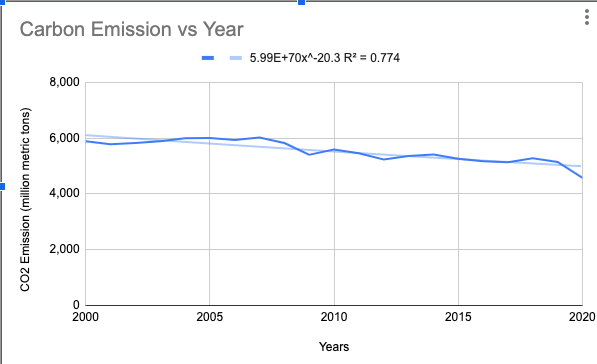

We can see that the equation for carbon dioxide emissions is given by 

\begin{equation} CarbonEmission(year) =  5.99 * 10^{70} * year^{-20} \end{equation}

Using the data, we can now calculate the emissions that are projected in the years 2025, 2030, and 2050.


In [112]:
carbon_2025 = 44558.05973; # millions of metric tons of CO2
carbon_2030 = 42413.69062; # millions of metric tons of CO2
carbon_2050 = 34861.78348; # millions of metric tons of CO2

We now must find the contriution that each electricity source has to carbon-dioxide emissions, and must find the unit price for producing 1kWHr of electricity using the specified fuel source. The compilied data for both is shown below





| Fuel Source          | Electricity Price (cents per kwHr)  |
|:------------- |:-------------:| 
| Coal        |    9.5   |
| Natural Gas          |    7.0   |
| Wind    |    9.7    |
| Hydroelectric          |    8.6   |
| Solar          |    7.0    |
| Nuclear          |    27.5    |
| Geothermal          |   5.0    |
| Oil          |    10.0     |





| Fuel Source          | Carbon Cost (g Carbon-Dioxide per kwHr Electricity Produced)  |
|:------------- |:-------------:| 
| Coal        |    820   |
| Natural Gas          |   490   |
| Wind    |   11.5   |
| Hydroelectric          |    24   |
| Solar          |    50    |
| Nuclear          |    12   |
| Geothermal          |   38    |
| Oil          |   970    |


With this data, we can now construct a model using the specifications given in Section 2. This first model focuses on the targets for the year 2025.


In [156]:
using JuMP, Gurobi

m5 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m5, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m5, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m5, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m5, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m5, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m5, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m5, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m5, o>=0); # Energy derived from oil in billions of kWhr 

@constraint(m5, g<=115*10^3/10^9) # Geothermal Energy Capacity
@constraint(m5, w<=118*10^6/10^9); # Wind Energy Capacity
@constraint(m5, h<= 80*10^6/10^9); # Hydrothermal Energy Capacity
@constraint(m5, s<= 115*1000000/10^9); # Solar Energy Capacity
@constraint(m5, ng+c+o <= 0.60 *4614.825714684543) # Maximal Fossil Fuel Contribution
@constraint(m5, c + ng + w + h + s + n + g + o == 4614.825714684543) # Electricity constraint must be met
@constraint(m5, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o ) <= 42413.69062*10^6*0.25); # Carbon Constraint
@objective(m5,Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) # Objective in dollars
print(m5)

optimize!(m5)

println("Amount of energy from coal is: ", value(c), " billions of kWhr")
println("Amount of energy from natural gas is: ", value(ng), " billions of kWhr")
println("Amount of energy from wind is: ",value(w), " billions of kWhr")
println("Amount of energy from hydroelectric is: ",value(h), " billions of kWhr")
println("Amount of energy from solar is: ",value(s), " billions of kWhr")
println("Amount of energy from nuclear is: ",value(n), " billions of kWhr")
println("Amount of energy from geothermal is: ",value(g), " billions of kWhr")
println("Amount of energy from oil/petroleum is: ",value(o), " billions of kWhr")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x1868c462
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.0139378e+11   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  7.013937838e+11

User-callback calls 45, time in user-callback 0.00 sec
Amount of energy from coal is: 0.0 billions

Moving to the 2030 Projections, we can perform similar analysis with the updated electricity projections and carbon emissions

In [158]:
using JuMP, Gurobi

m6 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m6, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m6, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m6, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m6, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m6, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m6, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m6, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m6, o>=0); # Energy derived from oil in billions of kWhr 

@constraint(m6, g<=115*10^3/10^9) # Geothermal Energy Capacity
@constraint(m6, w<=118*10^6/10^9); # Wind Energy Capacity
@constraint(m6, h<= 80*10^6/10^9); # Hydrothermal Energy Capacity
@constraint(m6, s<= 115*1000000/10^9); # Solar Energy Capacity
@constraint(m6, ng+c+o <= 0.40 * energy_2030) # Maximal Fossil Fuel Contribution
@constraint(m6, c + ng + w + h + s + n + g + o == energy_2030) # Electricity constraint must be met
@constraint(m6, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o ) <= carbon_2030*10^6*0.25); # Carbon Constraint
@objective(m6,Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) # Objective in dollars
print(m6)

optimize!(m6)

println("Amount of energy from coal is: ", value(c), " billions of kWhr")
println("Amount of energy from natural gas is: ", value(ng), " billions of kWhr")
println("Amount of energy from wind is: ",value(w), " billions of kWhr")
println("Amount of energy from hydroelectric is: ",value(h), " billions of kWhr")
println("Amount of energy from solar is: ",value(s), " billions of kWhr")
println("Amount of energy from nuclear is: ",value(n), " billions of kWhr")
println("Amount of energy from geothermal is: ",value(g), " billions of kWhr")
println("Amount of energy from oil/petroleum is: ",value(o), " billions of kWhr")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x43e42f2e
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.9060164e+11   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.906016381e+11

User-callback calls 45, time in user-callback 0.00 sec
Amount of energy from coal is: 0.0 billions

Finally, we look at the results of running this model with the projections from 2050.

In [187]:
using JuMP, Gurobi

m7 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m7, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m7, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m7, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m7, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m7, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m7, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m7, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m7, o>=0); # Energy derived from oil in billions of kWhr 

@constraint(m7, g<=115*10^3/10^9) # Geothermal Energy Capacity
@constraint(m7, w<=118*10^6/10^9); # Wind Energy Capacity
@constraint(m7, h<= 80*10^6/10^9); # Hydrothermal Energy Capacity
@constraint(m7, s<= 115*1000000/10^9); # Solar Energy Capacity
@constraint(m7, ng+c+o <= 0.60 * energy_2050) # Maximal Fossil Fuel Contribution
@constraint(m7, c + ng + w + h + s + n + g + o == energy_2050) # Electricity constraint must be met
@constraint(m7, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o ) <= carbon_2050*10^6*0.25); # Carbon Constraint
@objective(m7,Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) # Objective in dollars
print(m7)

optimize!(m7)

println("Amount of energy from coal is: ", value(c), " billions of kWhr")
println("Amount of energy from natural gas is: ", value(ng), " billions of kWhr")
println("Amount of energy from wind is: ",value(w), " billions of kWhr")
println("Amount of energy from hydroelectric is: ",value(h), " billions of kWhr")
println("Amount of energy from solar is: ",value(s), " billions of kWhr")
println("Amount of energy from nuclear is: ",value(n), " billions of kWhr")
println("Amount of energy from geothermal is: ",value(g), " billions of kWhr")
println("Amount of energy from oil/petroleum is: ",value(o), " billions of kWhr")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xce5fb621
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 9e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2399427e+11   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.239942721e+11

User-callback calls 45, time in user-callback 0.00 sec
Amount of energy from coal is: 0.0 billions

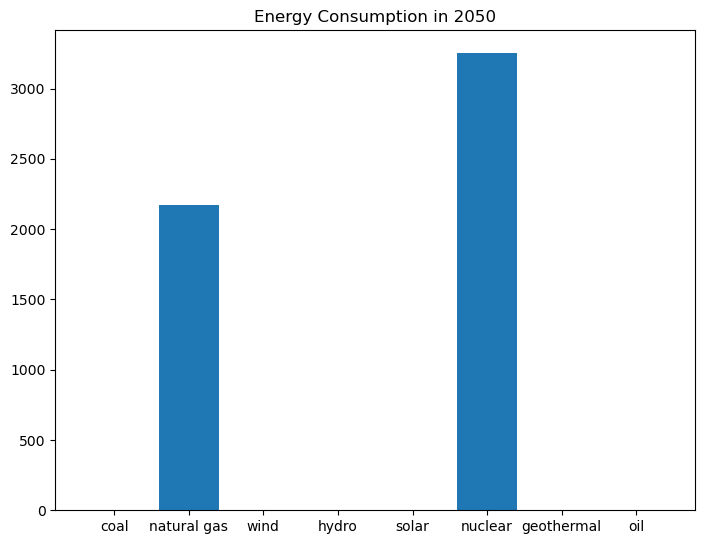

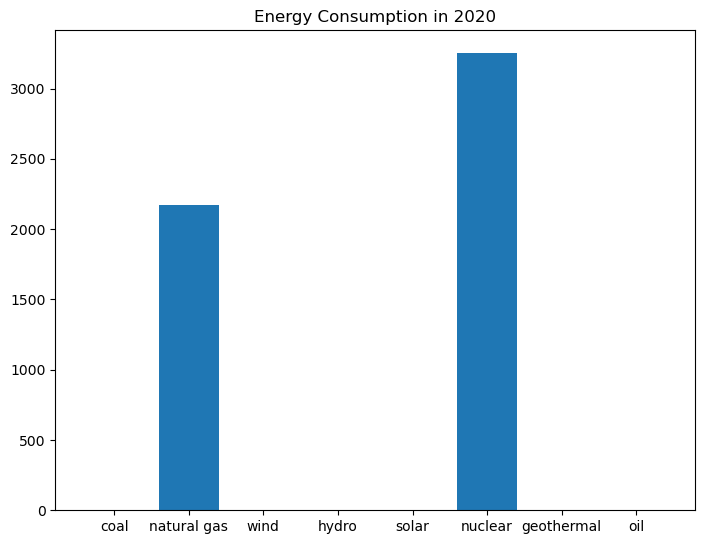

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [185]:
using PyPlot

amounts_2020 = [0.0, 1845.9302858738172, 0.11800000000000001, 0.08, 0.115, 2768.5823138107257,  0.000115, 0]
amounts_2050 = [0, 2168.5631500245304, 0.11800000000000001, 0.08, 0.115, 3252.5316100367963, 0.000115, 0]


energy = ["coal", "natural gas", "wind", "hydro","solar","nuclear","geothermal","oil"]



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(energy,amounts_2050)
plt.title("Energy Consumption in 2050")
fig.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(energy,amounts_2050)
plt.title("Energy Consumption in 2020")
fig1.show()


### Results

The overall results show that the meeting the required emission guidelines would require drastic shifts in the manner in which electricity is generated. Currently, 60.6% of all electricity is generated from fossil fuels, with the majority being produced via natural gas and coal. The results from both models show that to meet enviornmental emission goals, the majority of electrcitiy production would shift away from fossil fuels and move instead toward exclusively natural gas and nuclear energy. The shift from fossiel fuels moving towards natural gas has been occuring for many decades. Many coal-based power plants operzte in an extremely inefficient manner thus resulting in a drastic push away from their usage and towards that of natural gas. The usage of nuclear energy poses a variety of other risks. Although nuclear energy does not produce a high amount of Carbon-Dioxide, it does result in the production of highly radioactive waste whose long term-storage poses an extremely dangerous enviornmental risk. It can be seen that there is realtivel low levels of energy produced by wind, hydroelectric, and geothermal energy. This likely stems from a major problem that these renewables have: avaliability. Unlike fossil fuels, energy from these sources can only be extracted from specific locations and thus is accessible to small portions of the nation. To 

Despite the decrased amount emissions that are posed with these new projections, there is a substantial increase in the price felt to consumers. This can be seen as optimally meeting the emission requirements would result in an energy cost of 431 billion dollars. As we use less fossil fuels and instead use more nuclear energy, this price increases even more to being nearly 831 billion dollars. This represents a near doubling in the price of electricitiy and would have disasterous impacts on the United States economy.

This model assumes that the relative capacities of electricity production for solar, wind, geothermal, and hydroelectric would remain the same over the next 30 years. This is likely not true, and as concerted efforts are made to switch to renewables, these capacities will likely increase. Similarly, the costs for renewables will like decrease as improvements to these technologies will allow for increased electricity production for a cheaper price. A major issue with renewables is that their levels may fluctuate with time. A major advantage with fossil fuels is their consistency and reliability: electricity production using fossil fuels remains unaffected by external factors such as the weather. As such, it is unlikely that we will every be able to move fully away from fossil fuels and onto renewables as they will likely still be needed if the energy demand from the grid is greater than what renewables can provide. 